<a href="https://colab.research.google.com/github/serinss/seSAC_Python_Class/blob/main/%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%94_Numpy_%ED%99%9C%EC%9A%A9%ED%95%98%EB%8A%94_%EA%B3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 영상 처리

In [1]:
import cv2  #OpenCV 라이브러리를 사용하기 위한 구문
from google.colab.patches import cv2_imshow  #코랩에서 시각화를 위해 필요한 구문

In [2]:
cv2.__version__

'4.1.2'

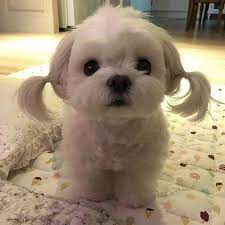

In [5]:
path = '/content/drive/MyDrive/module/dog.jpg'
image = cv2.imread(path, cv2.IMREAD_COLOR)
cv2_imshow(image)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
print(type(image))

<class 'numpy.ndarray'>


In [7]:
print(image.shape)  #(세로, 가로, RGB)

(225, 225, 3)


# 빈 이미지 만들어서 작업하기

In [8]:
import numpy as np
image = np.zeros((28, 28, 3), np.uint8)  #uint는 음수X (0~256)

In [9]:
cv2_imshow(image)

In [10]:
print(image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [11]:
image[:, :, 0] = 255
print(image)

[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


In [12]:
image[:, :, 2] = 255
cv2_imshow(image)

In [13]:
from tensorflow import keras

In [14]:
data = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [15]:
train_data, test_data = data #학습터 데이터와 평가용 데이터
print(type(train_data))
print(len(train_data))

<class 'tuple'>
2


In [16]:
image_train, label_train = train_data #이미지 데이터와 정답 데이터
print(image_train.shape)
print(label_train.shape)

(60000, 28, 28)
(60000,)


In [18]:
image = image_train[0] #영상처리 라이브러리를 통해 손글씨 이미지를 직접 볼 수 있음
cv2_imshow(image)

In [19]:
label = label_train[0]
print(label)

5
